In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
report = pd.read_csv('Autistic/autism_data.csv')
report.head(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO
5,1,1,1,1,1,0,1,1,1,1,...,m,Others,yes,no,United States,no,9.0,18 and more,Self,YES
6,0,1,0,0,0,0,0,1,0,0,...,f,Black,no,no,United States,no,2.0,18 and more,Self,NO
7,1,1,1,1,0,0,0,0,1,0,...,m,White-European,no,no,New Zealand,no,5.0,18 and more,Parent,NO
8,1,1,0,0,1,0,0,1,1,1,...,m,White-European,no,no,United States,no,6.0,18 and more,Self,NO
9,1,1,1,1,0,1,1,1,1,0,...,m,Asian,yes,yes,Bahamas,no,8.0,18 and more,Health care professional,YES


In [3]:
report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [4]:
report.describe().T

,count,mean,std,min,25%,50%,75%,max
A1_Score,704.0,0.721591,0.448535,0.0,0.0,1.0,1.0,1.0
A2_Score,704.0,0.453125,0.498152,0.0,0.0,0.0,1.0,1.0
A3_Score,704.0,0.457386,0.498535,0.0,0.0,0.0,1.0,1.0
A4_Score,704.0,0.495739,0.500337,0.0,0.0,0.0,1.0,1.0
A5_Score,704.0,0.498580,0.500353,0.0,0.0,0.0,1.0,1.0
A6_Score,704.0,0.284091,0.451301,0.0,0.0,0.0,1.0,1.0
A7_Score,704.0,0.417614,0.493516,0.0,0.0,0.0,1.0,1.0
A8_Score,704.0,0.649148,0.477576,0.0,0.0,1.0,1.0,1.0
A9_Score,704.0,0.323864,0.468281,0.0,0.0,0.0,1.0,1.0
A10_Score,704.0,0.573864,0.494866,0.0,0.0,1.0,1.0,1.0


In [5]:
report.replace('?',np.nan, inplace = True)

In [6]:
print("Missing values per column\n",report.isnull().sum())

Missing values per column
 A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64


In [7]:
report.drop(columns=['age_desc','result'],inplace = True)

In [8]:
for column in ['ethnicity','gender','relation']:
    report[column].fillna(report[column].mode(0),inplace = True)

In [9]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_enc = LabelEncoder()
for column in ['gender','austim','ethnicity','jundice','used_app_before','contry_of_res','relation']:
    report[column]=label_enc.fit_transform(report[column].astype(str))
    
report['sum'] = report[['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score']].sum(axis = 1)

In [10]:
report.head(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,relation,Class/ASD,sum
0,1,1,1,1,0,0,1,1,0,0,26.0,0,9,0,0,64,0,4,NO,6
1,1,1,0,1,0,0,0,1,0,1,24.0,1,3,0,1,13,0,4,NO,5
2,1,1,0,1,1,0,1,1,1,1,27.0,1,3,1,1,56,0,2,YES,8
3,1,1,0,1,0,0,1,1,0,1,35.0,0,9,0,1,64,0,4,NO,6
4,1,0,0,0,0,0,0,1,0,0,40.0,0,10,0,0,22,0,5,NO,2


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

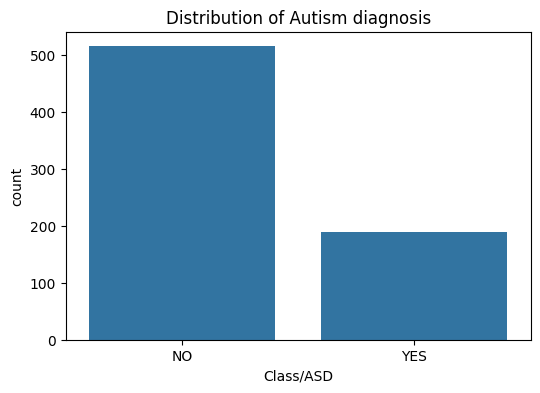

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class/ASD', data=report)
plt.title('Distribution of Autism diagnosis')
plt.show()

In [13]:
report['Class/ASD'] = report['Class/ASD'].map({'NO': 0, 'YES': 1}).astype(float)

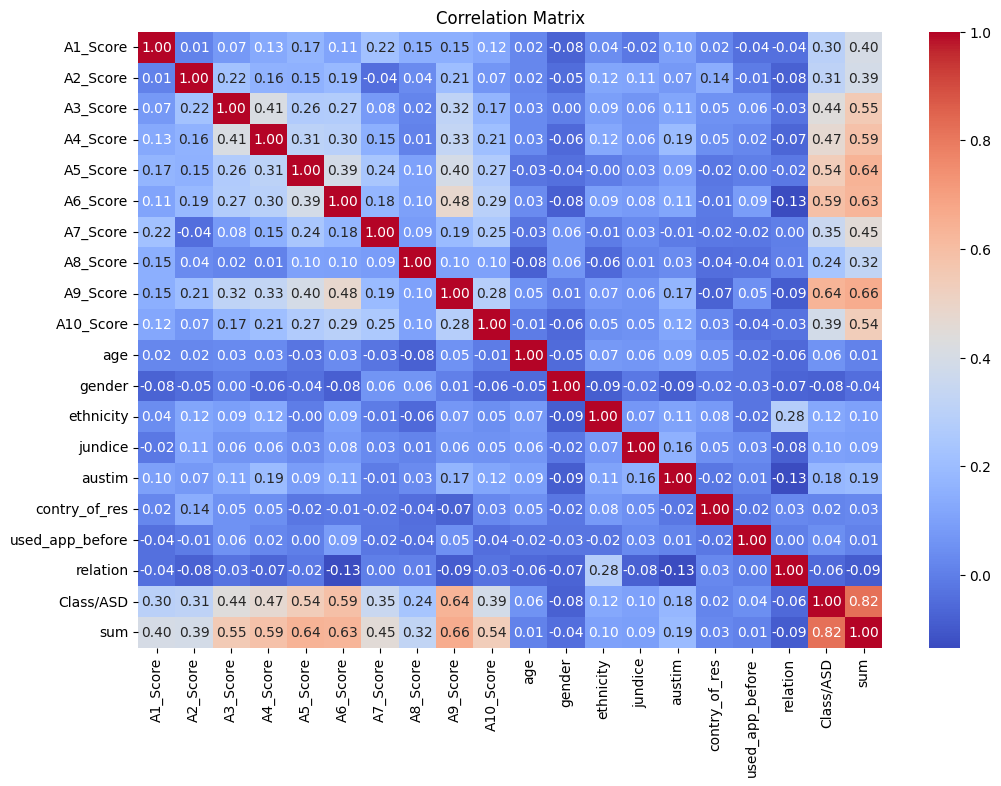

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(report.corr(),annot = True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [15]:
x = report.drop(columns = ['Class/ASD'])
y = report['Class/ASD']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 40)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [17]:
missing_values = np.isnan(x_train_scaled).sum()  
print(f"Number of missing values in x_train_scaled: {missing_values}")

Number of missing values in x_train_scaled: 1


In [18]:
from sklearn.impute import SimpleImputer

if missing_values > 0:
    imputer = SimpleImputer(strategy='mean')
    x_train_scaled = imputer.fit_transform(x_train_scaled)
    
if missing_values > 0:
    imputer = SimpleImputer(strategy='mean')
    x_test_scaled = imputer.fit_transform(x_test_scaled)

In [19]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression()
model.fit(x_train_scaled,y_train)

LogisticRegression()

In [20]:
y_pred = model.predict(x_test_scaled)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 100.00%


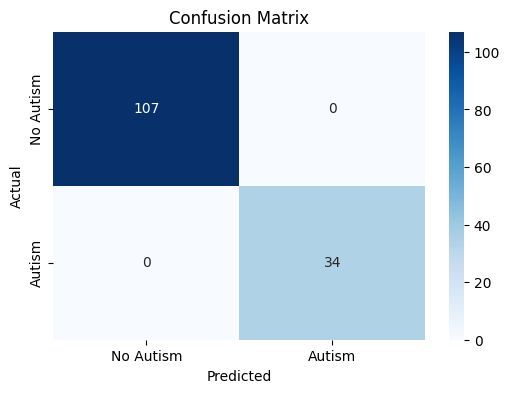

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Autism', 'Autism'], yticklabels=['No Autism', 'Autism'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       107
         1.0       1.00      1.00      1.00        34

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141



In [24]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state = 40)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=40)

In [25]:
y_pred_dt = dt_model.predict(x_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 1.0
Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       107
         1.0       1.00      1.00      1.00        34

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141



In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB

pipeline = make_pipeline(imputer,GaussianNB())
nb_model = GaussianNB()
pipeline.fit(x_train,y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('gaussiannb', GaussianNB())])

In [27]:
x_train = np.array(x_train)
y_train = np.array(y_train)

non_nan_indices = ~np.isnan(x_train).any(axis=1) & ~np.isnan(y_train)

x_train_clean = x_train[non_nan_indices]
y_train_clean = y_train[non_nan_indices]

nb_model = GaussianNB()
nb_model.fit(x_train_clean, y_train_clean)


GaussianNB()

In [28]:
# Remove rows with NaN values from x_test and y_test
x_test_clean = x_test[~np.isnan(x_test).any(axis=1)]
y_test_clean = y_test[~np.isnan(y_test)]


In [30]:
mask = ~np.isnan(x_test).any(axis=1)

x_test_clean = x_test[mask]
y_test_clean = y_test[mask]

y_pred_nb = nb_model.predict(x_test_clean)

print("Naive Bayes Accuracy:", accuracy_score(y_test_clean, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test_clean, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_clean, y_pred_nb))

Naive Bayes Accuracy: 0.9928571428571429

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       106
         1.0       0.97      1.00      0.99        34

    accuracy                           0.99       140
   macro avg       0.99      1.00      0.99       140
weighted avg       0.99      0.99      0.99       140


Confusion Matrix:
 [[105   1]
 [  0  34]]


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

imputer = SimpleImputer(strategy='mean') 

x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(x_train_imputed, y_train)

y_pred_knn = knn_model.predict(x_test_imputed)

accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Model Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Model Accuracy: 92.20%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       107
         1.0       0.96      0.71      0.81        34

    accuracy                           0.92       141
   macro avg       0.94      0.85      0.88       141
weighted avg       0.92      0.92      0.92       141


Confusion Matrix:
 [[106   1]
 [ 10  24]]
